In [1]:
#REGRESION LINEAL   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#ls #Ls me nuestra la informacion que tengo en ese archivo
# pwd para saber donde nos encontramo la ubicacion.

 El volumen de la unidad C es Windows
 El n�mero de serie del volumen es: A025-E3A0

 Directorio de c:\Users\alex_\OneDrive\Documentos\Machine Learning WithPython\Modulos Python\Modulos Python\AS

12/09/2024  10:44    <DIR>          .
12/09/2024  10:30    <DIR>          ..
12/09/2024  10:30                 0 regresionLineal.ipynb
12/09/2024  10:44           726,209 USA_Housing.csv
               2 archivos        726,209 bytes
               2 dirs  303,344,238,592 bytes libres


In [5]:
casas = pd.read_csv("USA_Housing.csv")

In [6]:
casas

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [7]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [11]:
casas['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

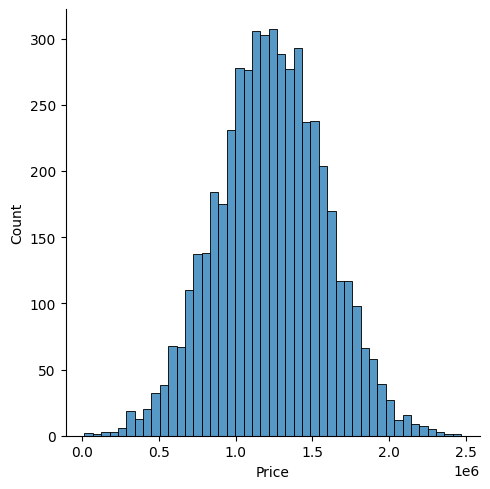

In [13]:
sns.displot(casas['Price'])


In [15]:
casas_numericas = casas.select_dtypes(include=['number'])
correlation_matrix = casas_numericas.corr()

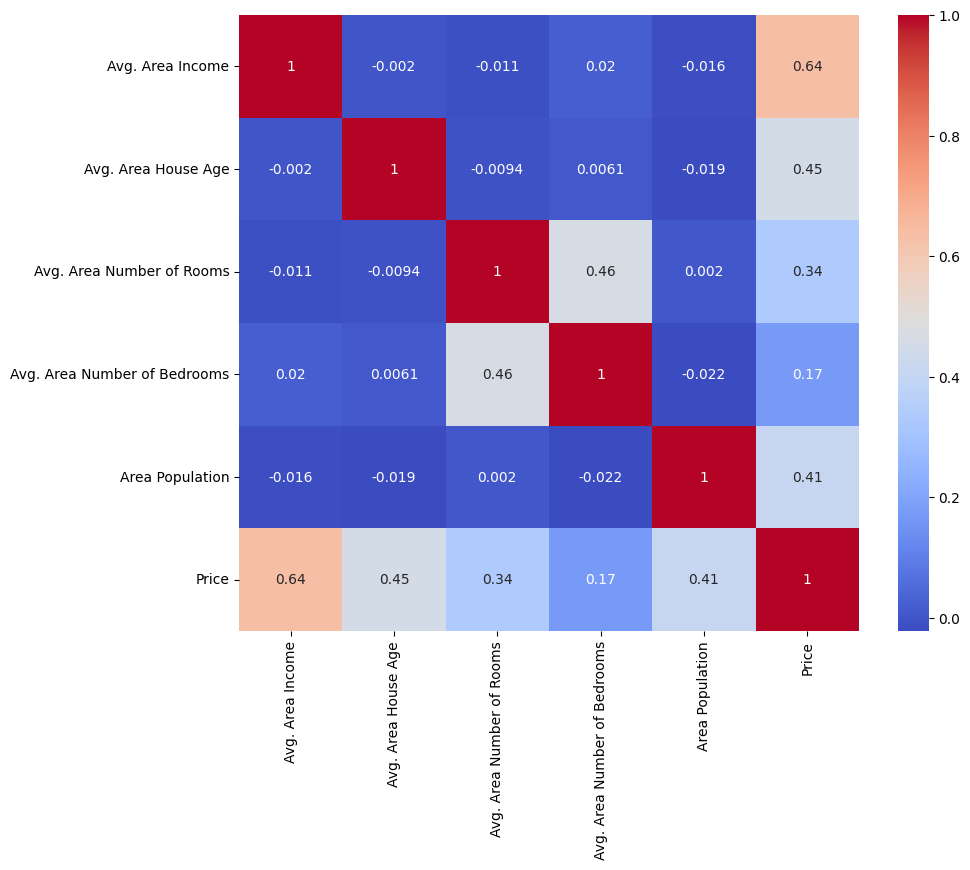

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(casas_numericas.corr(), annot=True, cmap="coolwarm")
plt.show()

In [17]:
#MACHINE LEARNING  #esta libreria este especializada en machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
casas.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [20]:
X = casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population',]]
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [21]:
y = casas['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [22]:
#Los modelos de inteligencia artificial no entienden de letras 
y.combine_first

<bound method Series.combine_first of 0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64>

In [24]:
# con el 42 inicializas los valores, puede ser 1 o cualquier otro número
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X ,y, test_size=0.2, random_state=42)

In [25]:
X_entrena

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4227,66547.016454,5.846095,6.847298,4.13,27850.822901
4676,53722.008599,6.401391,7.787764,3.30,47649.224665
800,64838.492899,6.437157,8.699544,4.02,32921.010068
3671,67097.092120,6.086754,7.211963,3.05,27191.506877
4193,75245.465436,8.167820,7.420100,3.42,37410.669928
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


In [43]:
X_prueba

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
4711,77267.656264,3.939501,8.342808,6.09,22487.712072
2313,75967.135085,5.939370,6.111658,2.32,38897.091584
3214,81013.615294,7.149797,7.239105,5.44,45472.049451
2732,86762.882864,6.530193,5.106962,2.09,47724.581355


In [44]:
# Elegimos el modelo de entrenamiento
mrl = LinearRegression()
mrl.fit(X_entrena, y_entrena)

LinearRegression()

In [45]:
entrada =np.array([[69391.3801843616,5.344776176735725,8.406417714534253,4.37,35521.294033173246]])
prediction = mrl.predict(entrada)
prediction

c:\Users\alex_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1306204.18330553])

In [31]:
y_prueba

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
4711    1.107031e+06
2313    1.405505e+06
3214    1.924156e+06
2732    1.571254e+06
1926    8.831475e+05
Name: Price, Length: 1000, dtype: float64

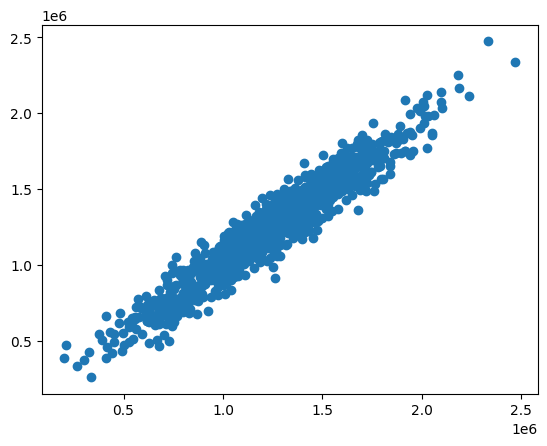

In [32]:
# Vamos a plotear nuestros datos
plt.scatter(y_prueba, prediction)
plt.title("Mi mancha")

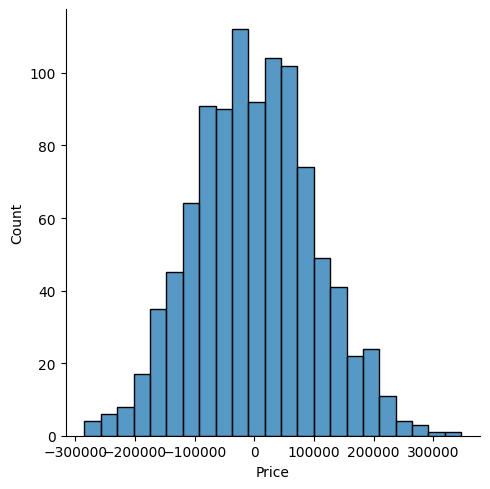

In [34]:
sns.displot(y_prueba-prediction)